In [ ]:
# Connexion a google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# liste des fichiers disponibles
!ls "/content/drive/MyDrive/Accidents/datas/Regroupement"

drive = True
path = "/content/drive/MyDrive/Accidents/"
pathData = "/content/drive/MyDrive/Accidents/datas/Regroupement/"

Accidents_2005_to_2023.csv			 df_France_Accidents_2005_2023.csv
Accidents_France_2005_to_2023.csv		 df_SeineMaritime_Accidents_2005_2023.csv
Accidents_regions_France_2005_to_2023.csv	 df_tuees_50.csv
caracteristiques_2005_to_2023.csv		 fusion_usagers_2005_to_2023.csv
caracteristiques_2005_to_2023_step1.csv		 fusion_usagers_France_2005_to_2023.csv
caracteristiques_2005_to_2023_step2.csv		 fusion_usagers_Seine_Maritime_2005_to_2023.csv
Caracteristiques_lieux_2005_to_2023.csv		 lieux_2005_to_2023.csv
Caracteristiques_lieux_Usagers_2005_to_2023.csv  usagers_2005_to_2023.csv
Caracteristiques_Usagers_2005_to_2023.csv	 usagers_2023.csv
df_Accidents_Usagers_76_lat_long.csv		 vehicules_2005_to_2023.csv


In [ ]:
# Importation librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
#from xplotter.insights import *

sns.set_style('whitegrid')

# pour ne pas imprimer les warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Chargement dataset Global
df_caracteristiques =pd.read_csv(pathData + 'Accidents_France_2005_to_2023.csv', sep=',',low_memory=False)

In [ ]:
# Chargement dataset Global
df_caracteristiques_76 = df_caracteristiques[df_caracteristiques.dep == 76]

In [ ]:
df_caracteristiques_76.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,col,adr,lat,long,gps,com_insee_temp,com_insee,departmentName,regionCode,regionName
98,202300000110,28,3,2023,16:30,1,76.0,76231,2,2,...,6.0,Rue Théodore Chennevière,"49,28606000","1,00347000",NaN,76.076231,76231,Seine-Maritime,28.0,Normandie
194,202300000214,25,3,2023,13:45,1,76.0,76351,2,1,...,3.0,PAUL VERLAINE (AVENUE),"49,50910000","0,15690000",NaN,76.076351,76351,Seine-Maritime,28.0,Normandie
244,202300000267,29,11,2023,13:15,1,76.0,76575,2,1,...,-1.0,Rue Paul Eluard,"49,39615000","1,09471000",NaN,76.076575,76575,Seine-Maritime,28.0,Normandie
246,202300000269,28,11,2023,13:00,1,76.0,76351,2,2,...,6.0,RENE COTY,"49,49754000","0,11561000",NaN,76.076351,76351,Seine-Maritime,28.0,Normandie
248,202300000271,28,11,2023,23:35,5,76.0,76351,2,1,...,6.0,Rue Commandant Abadie,"49,50123000","0,17188000",NaN,76.076351,76351,Seine-Maritime,28.0,Normandie


In [ ]:
df_caracteristiques_76.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15953 entries, 98 to 1193346
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Num_Acc         15953 non-null  int64  
 1   jour            15953 non-null  int64  
 2   mois            15953 non-null  int64  
 3   an              15953 non-null  int64  
 4   hrmn            15953 non-null  object 
 5   lum             15953 non-null  int64  
 6   dep             15953 non-null  float64
 7   com             15953 non-null  object 
 8   agg             15953 non-null  int64  
 9   int             15953 non-null  int64  
 10  atm             15953 non-null  float64
 11  col             15953 non-null  float64
 12  adr             13704 non-null  object 
 13  lat             11767 non-null  object 
 14  long            11767 non-null  object 
 15  gps             8215 non-null   object 
 16  com_insee_temp  15953 non-null  object 
 17  com_insee       15953 non-null  o

In [ ]:
df_caracteristiques.head(10)

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,col,adr,lat,long,gps,com_insee_temp,com_insee,departmentName,regionCode,regionName
0,202300000001,7,5,2023,06:00,1,75.0,75101,2,4,...,7.0,RUE DE RIVOLI,"48,86638600","2,32347100",NaN,75.075101,75101,Paris,11.0,Ile-de-France
1,202300000002,7,5,2023,05:30,5,94.0,94080,2,1,...,6.0,Avenue de Paris,"48,84547782","2,42868146",NaN,94.094080,94080,Val-de-Marne,11.0,Ile-de-France
2,202300000003,7,5,2023,20:50,1,94.0,94022,2,3,...,1.0,Avenue du Général Leclerc,"48,76240000","2,40655000",NaN,94.094022,94022,Val-de-Marne,11.0,Ile-de-France
3,202300000004,6,5,2023,23:57,5,94.0,94078,2,1,...,5.0,Rue de Paris,"48,73248432","2,44687575",NaN,94.094078,94078,Val-de-Marne,11.0,Ile-de-France
4,202300000005,7,5,2023,00:50,5,94.0,94068,2,2,...,3.0,56bis Avenue Raspail,"48,78581000","2,49217000",NaN,94.094068,94068,Val-de-Marne,11.0,Ile-de-France
5,202300000006,7,5,2023,18:10,1,94.0,94058,2,3,...,6.0,Avenue Gabriel Péri,"48,83717000","2,51361000",NaN,94.094058,94058,Val-de-Marne,11.0,Ile-de-France
6,202300000007,7,5,2023,18:45,1,94.0,94076,2,1,...,4.0,185 Boulevard Maxime Gorki,"48,78693219","2,36756095",NaN,94.094076,94076,Val-de-Marne,11.0,Ile-de-France
7,202300000008,7,5,2023,17:20,1,94.0,94011,2,2,...,1.0,Route de Stains / Rue du Moulin Bateau,"48,78238000","2,49510000",NaN,94.094011,94011,Val-de-Marne,11.0,Ile-de-France
8,202300000009,7,5,2023,18:50,1,94.0,94022,2,3,...,3.0,Avenue de la République,"48,76240184","2,40690601",NaN,94.094022,94022,Val-de-Marne,11.0,Ile-de-France
9,202300000010,7,5,2023,18:20,1,94.0,94079,2,1,...,6.0,Boulevard de Friedberg,"48,83266000","2,54378000",NaN,94.094079,94079,Val-de-Marne,11.0,Ile-de-France


In [ ]:
count_accident_par_region_et_annee = df_caracteristiques[df_caracteristiques.an == 2023]

In [ ]:
# Nombre d'accidents par région et par année
# Nombre d'accidents par région
df_count=pd.DataFrame({'Count': count_accident_par_region_et_annee["regionName"].value_counts().sort_values(ascending = False)})

In [ ]:
df_count.head(10)

,Count
regionName,
Ile-de-France,15943
Auvergne-Rhône-Alpes,5863
Provence-Alpes-Côte d'Azur,4426
Nouvelle-Aquitaine,4300
Occitanie,3572
Grand-Est,3374
Bretagne,2486
Nord-Pas-de-Calais-Picardie,2409
Normandie,2382


In [ ]:
# Sauvegarde des Accidents par région pour les années 2005 à 2023
count_accident_par_region_et_annee.to_csv(pathData + 'Accidents_regions_France_2005_to_2023.csv', index=False)

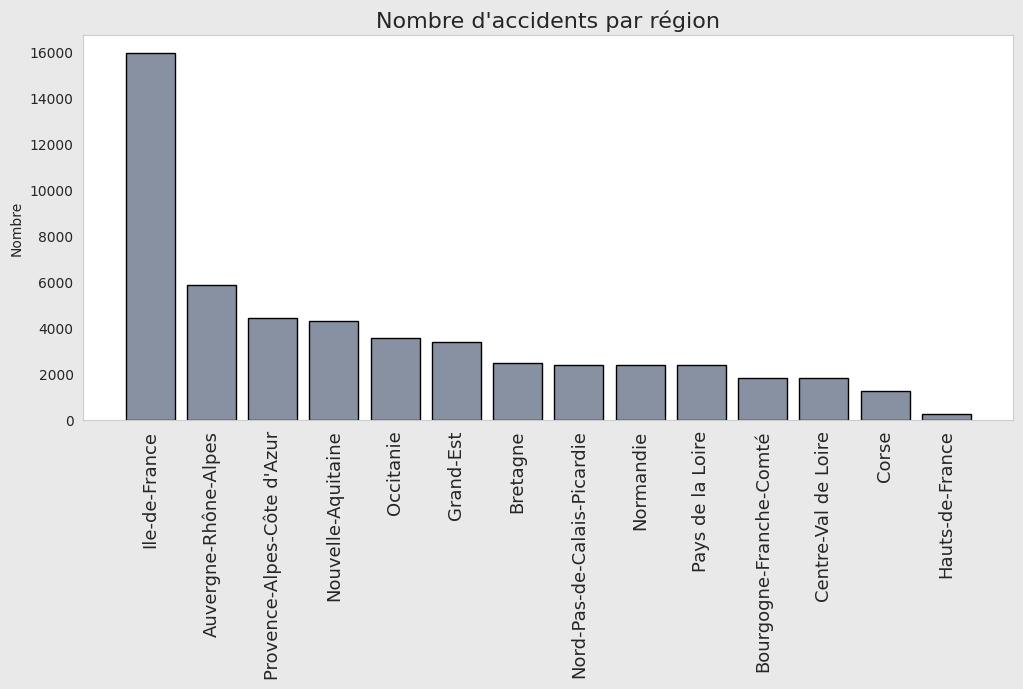

In [ ]:
label=list(df_count.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre d'accidents par région",size=16)
plt.bar(range(0,len(label)),df_count["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

In [ ]:
df_Accidents_Usagers_France =pd.read_csv(pathData + 'fusion_usagers_France_2005_to_2023.csv', sep=',',low_memory=False)
df_Accidents_Usagers_76 = df_Accidents_Usagers_France[df_Accidents_Usagers_France.dep == 76]

In [ ]:
df_Accidents_Usagers_76.head(10)

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
218,202300000110,28,3,2023,16:30,1,76.0,76231,2,2,...,3,4,1,2.0,0.0,2.0,3,2.0,2016.0,A01
219,202300000110,28,3,2023,16:30,1,76.0,76231,2,2,...,3,1,1,2.0,0.0,5.0,9,1.0,2010.0,A01
220,202300000110,28,3,2023,16:30,1,76.0,76231,2,2,...,1,1,1,5.0,1.0,-1.0,-1,-1.0,1945.0,A01
432,202300000214,25,3,2023,13:45,1,76.0,76351,2,1,...,1,4,1,0.0,1.0,-1.0,-1,-1.0,1975.0,B01
433,202300000214,25,3,2023,13:45,1,76.0,76351,2,1,...,1,1,1,5.0,1.0,-1.0,-1,-1.0,1974.0,A01
544,202300000267,29,11,2023,13:15,1,76.0,76575,2,1,...,1,4,2,2.0,8.0,-1.0,-1,-1.0,2004.0,A01
545,202300000267,29,11,2023,13:15,1,76.0,76575,2,1,...,2,4,1,2.0,8.0,-1.0,-1,-1.0,2004.0,A01
551,202300000269,28,11,2023,13:00,1,76.0,76351,2,2,...,1,1,1,0.0,1.0,-1.0,-1,-1.0,1988.0,A01
552,202300000269,28,11,2023,13:00,1,76.0,76351,2,2,...,3,4,2,0.0,0.0,9.0,B,1.0,2000.0,A01
555,202300000271,28,11,2023,23:35,5,76.0,76351,2,1,...,3,4,1,0.0,0.0,3.0,3,1.0,1983.0,Z01


In [ ]:
df_Accidents_Usagers_76.lat = df_Accidents_Usagers_76.lat.str.replace(',','.')
df_Accidents_Usagers_76.long = df_Accidents_Usagers_76.long.str.replace(',','.')
df_Accidents_Usagers_76.lat = df_Accidents_Usagers_76.lat.astype(float)
df_Accidents_Usagers_76.long = df_Accidents_Usagers_76.long.replace('-',0).astype(float)

In [ ]:
df_Accidents_Usagers_76.dropna(subset=['long', 'lat'],inplace=True)

In [ ]:
# Sauvegarde des Accidents et blesses en Seine maritime pour les années 2005 à 2023
df_Accidents_Usagers_76.to_csv(pathData + 'df_Accidents_Usagers_76_lat_long.csv', index=False)

In [ ]:
# Charger les lieux et accidents
df_Accidents_Lieux_France =pd.read_csv(pathData + 'Caracteristiques_lieux_2005_to_2023.csv', sep=',',low_memory=False)


In [ ]:
# Ne prendre que le département 76
df_Accidents_Lieux_France = df_Accidents_Lieux_France[df_Accidents_Lieux_France.dep == 76]

In [ ]:
# Charger les lieux et accidents et usagers
df_Accidents_Lieux_Usagers_France =pd.read_csv(pathData + 'Caracteristiques_lieux_Usagers_2005_to_2023.csv', sep=',',low_memory=False)


In [ ]:
# Ne prendre que le département 76
df_Accidents_Lieux_Usagers_France_76 = df_Accidents_Lieux_Usagers_France[df_Accidents_Lieux_Usagers_France.dep == 76]

In [ ]:
# Transformation des variables pour que ca soit plus clair

dico = {'catr': 'categorie_route',
             'circ': 'sens_circulation',
             'nbv': 'nbr_voies',
             'vosp': 'voie_reservee',
             'prof': 'declivite_route',
             'pr': 'num_borne_amont',
             'pr1': 'distance_borne_metre',
             'plan': 'trace_plan',
             'surf': 'etat_surface',
             'infra': 'infrastructure',
             'situ': 'situation_accident',
             'vma': 'vitesse_maximale_autorisee',
             'agg': 'agglomeration'
        }

df_Accidents_Lieux_France.rename(columns=dico, inplace=True)

df_Accidents_Lieux_France.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16284 entries, 114 to 1201637
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Num_Acc                     16284 non-null  int64  
 1   jour                        16284 non-null  int64  
 2   mois                        16284 non-null  int64  
 3   an                          16284 non-null  int64  
 4   hrmn                        16284 non-null  object 
 5   lum                         16284 non-null  int64  
 6   dep                         16284 non-null  float64
 7   com                         16284 non-null  object 
 8   agglomeration               16284 non-null  int64  
 9   int                         16284 non-null  int64  
 10  atm                         16284 non-null  float64
 11  col                         16284 non-null  float64
 12  adr                         14035 non-null  object 
 13  lat                         1209

In [ ]:
dico_route = {1: "autoroute",
              2: "route_nationale",
              3: "route_Départementale",
              4: "voie_communale",
              5: "autre_type_route",
              6: "autre_type_route",
              7: "autre_type_route",
              9: "autre_type_route"}

df_Accidents_Lieux_France['categorie_route'] = df_Accidents_Lieux_France['categorie_route'].map(dico_route)

In [ ]:

dico_sens = {1: "sens_unique",
             2: "bidirectionnelle",
             3: "chaussées_séparées",
             4: "autre_sens",
             -1: "autre_sens"}

df_Accidents_Lieux_France['sens_circulation'] = df_Accidents_Lieux_France['sens_circulation'].map(dico_sens)

In [ ]:
def categorie_analyze(dataframe, variable):
    print(variable)
    print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "POURCENTAGE": dataframe[variable].value_counts() / len(dataframe) *100}), end="\n\n\n")

In [ ]:
df_Accidents_Lieux_France_2023 = df_Accidents_Lieux_France[df_Accidents_Lieux_France.an == 2023]

In [ ]:
df_Accidents_Lieux_France.head(50)

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agglomeration,int,...,num_borne_amont,distance_borne_metre,trace_plan,lartpc,larrout,etat_surface,infrastructure,situation_accident,vitesse_maximale_autorisee,env1
114,202300000110,28,3,2023,16:30,1,76.0,76231,2,2,...,0,0,1.0,NaN,-1,1.0,0.0,1.0,30.0,NaN
115,202300000110,28,3,2023,16:30,1,76.0,76231,2,2,...,-1,-1,1.0,NaN,-1,1.0,0.0,1.0,50.0,NaN
236,202300000214,25,3,2023,13:45,1,76.0,76351,2,1,...,0,0,1.0,NaN,-1,2.0,0.0,1.0,50.0,NaN
303,202300000267,29,11,2023,13:15,1,76.0,76575,2,1,...,-1,-1,1.0,NaN,-1,9.0,0.0,1.0,30.0,NaN
306,202300000269,28,11,2023,13:00,1,76.0,76351,2,2,...,0,0,1.0,NaN,-1,1.0,0.0,1.0,30.0,NaN
307,202300000269,28,11,2023,13:00,1,76.0,76351,2,2,...,0,0,1.0,NaN,-1,1.0,0.0,1.0,50.0,NaN
310,202300000271,28,11,2023,23:35,5,76.0,76351,2,1,...,0,0,1.0,NaN,-1,2.0,0.0,1.0,50.0,NaN
313,202300000274,26,11,2023,17:35,5,76.0,76114,2,3,...,-1,-1,1.0,NaN,-1,1.0,0.0,1.0,-1.0,NaN
314,202300000274,26,11,2023,17:35,5,76.0,76114,2,3,...,0,0,1.0,NaN,-1,1.0,0.0,1.0,50.0,NaN
497,202300000420,9,6,2023,07:55,1,76.0,76351,2,3,...,0,0,1.0,NaN,-1,1.0,0.0,1.0,50.0,NaN


In [ ]:
#Nombre d'accidents selon la catégorie de la route

categorie_analyze(df_Accidents_Lieux_France_2023, "categorie_route")

categorie_route
                      COUNT  POURCENTAGE
categorie_route                         
voie_communale          516    46.030330
route_Départementale    325    28.991971
autre_type_route        239    21.320250
autoroute                22     1.962533
route_nationale          19     1.694915




In [ ]:
!pip install xplotter

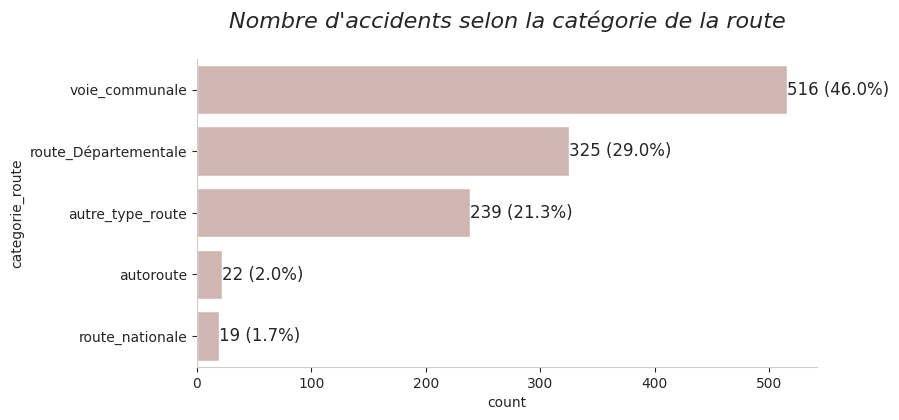

In [ ]:
# Visualisation
import seaborn as sns
from xplotter.insights import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 6, 4

sns.set_style("ticks")
sns.color_palette("pink", as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 4))

plot_countplot(df=df_Accidents_Lieux_France_2023,
               col='categorie_route',
               order=True,
               palette=['#d4b3ac'],
               ax=ax, orient='h',
               size_labels=12)

plt.title("Nombre d'accidents selon la catégorie de la route\n",
          loc="center", fontsize=16, fontstyle='italic')
plt.show()

In [ ]:
#Nombre d'accidents selon le sens de la circulation
categorie_analyze(df_Accidents_Lieux_France_2023, 'sens_circulation')

sens_circulation
                    COUNT  POURCENTAGE
sens_circulation                      
bidirectionnelle      862    76.895629
sens_unique           125    11.150758
chaussées_séparées     80     7.136485
autre_sens             54     4.817128




In [ ]:
# Nombre d'accidents selon la vitesse maximale autorisée
categorie_analyze(df_Accidents_Lieux_France_2023, 'vitesse_maximale_autorisee')



vitesse_maximale_autorisee
                            COUNT  POURCENTAGE
vitesse_maximale_autorisee                    
 50.0                         655    58.429973
 80.0                         152    13.559322
 30.0                         126    11.239964
-1.0                           78     6.958073
 70.0                          64     5.709188
 90.0                          19     1.694915
 110.0                         13     1.159679
 130.0                         12     1.070473
 20.0                           2     0.178412




In [ ]:
# Nombre d'accidents par type d'agglomeration
categorie_analyze(df_Accidents_Lieux_France_2023, 'agglomeration')

agglomeration
               COUNT  POURCENTAGE
agglomeration                    
2                799    71.275647
1                322    28.724353




In [ ]:
df_Accidents_Lieux_Usagers_76_2023 = df_Accidents_Lieux_Usagers_France_76[df_Accidents_Lieux_Usagers_France_76.an == 2023]

In [ ]:
df_Accidents_Lieux_Usagers_76_2023_tues = df_Accidents_Lieux_Usagers_76_2023[df_Accidents_Lieux_Usagers_76_2023.grav == 2]

In [ ]:
df_Accidents_Lieux_Usagers_76_2023_tues.shape

(54, 51)

In [ ]:
df_Accidents_Lieux_Usagers_76_2023_tues.rename(columns=dico, inplace=True)
df_Accidents_Lieux_Usagers_76_2023_tues['categorie_route'] = df_Accidents_Lieux_Usagers_76_2023_tues['categorie_route'].map(dico_route)
df_Accidents_Lieux_Usagers_76_2023_tues['sens_circulation'] = df_Accidents_Lieux_Usagers_76_2023_tues['sens_circulation'].map(dico_sens)
df_Accidents_Lieux_Usagers_76_2023_tues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1261 to 152231
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Num_Acc                     54 non-null     int64  
 1   jour                        54 non-null     int64  
 2   mois                        54 non-null     int64  
 3   an                          54 non-null     int64  
 4   hrmn                        54 non-null     object 
 5   lum                         54 non-null     int64  
 6   dep                         54 non-null     float64
 7   com                         54 non-null     object 
 8   agglomeration               54 non-null     int64  
 9   int                         54 non-null     int64  
 10  atm                         54 non-null     float64
 11  col                         54 non-null     float64
 12  adr                         54 non-null     object 
 13  lat                         54 non-

In [ ]:
# Nombre de Tués Agglomeration
categorie_analyze(df_Accidents_Lieux_Usagers_76_2023_tues, 'agglomeration')

agglomeration
               COUNT  POURCENTAGE
agglomeration                    
2                 31    57.407407
1                 23    42.592593




In [ ]:
# Nombre de Tués Agglomeration
df_Accidents_Lieux_Usagers_76_2023_tues_agglo = df_Accidents_Lieux_Usagers_76_2023_tues[df_Accidents_Lieux_Usagers_76_2023_tues.agglomeration == 1]

categorie_analyze(df_Accidents_Lieux_Usagers_76_2023_tues_agglo, 'vitesse_maximale_autorisee')

vitesse_maximale_autorisee
                            COUNT  POURCENTAGE
vitesse_maximale_autorisee                    
 80.0                          13    56.521739
 70.0                           6    26.086957
-1.0                            3    13.043478
 90.0                           1     4.347826




In [ ]:
# Nombre de Tués Hors Agglomeration
df_Accidents_Lieux_Usagers_76_2023_tues_hors_agglo = df_Accidents_Lieux_Usagers_76_2023_tues[df_Accidents_Lieux_Usagers_76_2023_tues.agglomeration == 2]

categorie_analyze(df_Accidents_Lieux_Usagers_76_2023_tues_hors_agglo, 'vitesse_maximale_autorisee')

vitesse_maximale_autorisee
                            COUNT  POURCENTAGE
vitesse_maximale_autorisee                    
 50.0                          25    80.645161
 30.0                           3     9.677419
-1.0                            2     6.451613
 70.0                           1     3.225806




In [ ]:
# Trouvez pour les 25 accidents mortels les numéro d'accidents
# Analyse des accidents
# Type de chocs
# Seul
df_tuees_50 = df_Accidents_Lieux_Usagers_76_2023_tues_hors_agglo[df_Accidents_Lieux_Usagers_76_2023_tues_hors_agglo.vitesse_maximale_autorisee == 50.0]

In [ ]:
# Type de vehicules

In [ ]:
df_tuees_50.head(30)

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agglomeration,int,...,secu,locp,actp,etatp,an_nais,num_veh,id_usager,id_vehicule,secu2,secu3
1261,202300000470,9,6,2023,06:35,1,76.0,76341,2,4,...,2.0,-1.0,-1,-1.0,1984.0,A01,NaN,NaN,NaN,NaN
1264,202300000470,9,6,2023,06:35,1,76.0,76341,2,4,...,2.0,-1.0,-1,-1.0,1984.0,A01,NaN,NaN,NaN,NaN
20385,202300007294,18,8,2023,02:00,3,76.0,76123,2,3,...,2.0,0.0,0,-1.0,1972.0,B01,NaN,NaN,NaN,NaN
31028,202300011002,13,8,2023,23:50,5,76.0,76351,2,2,...,2.0,-1.0,-1,-1.0,1997.0,A01,NaN,NaN,NaN,NaN
31029,202300011002,13,8,2023,23:50,5,76.0,76351,2,2,...,2.0,-1.0,-1,-1.0,1997.0,A01,NaN,NaN,NaN,NaN
35559,202300012548,7,7,2023,03:36,5,76.0,76540,2,2,...,8.0,0.0,0,-1.0,2000.0,B01,NaN,NaN,NaN,NaN
35561,202300012548,7,7,2023,03:36,5,76.0,76540,2,2,...,8.0,0.0,0,-1.0,2000.0,B01,NaN,NaN,NaN,NaN
38582,202300013657,28,4,2023,13:00,1,76.0,76232,2,1,...,0.0,0.0,0,-1.0,1953.0,A01,NaN,NaN,NaN,NaN
45685,202300016178,8,8,2023,12:00,1,76.0,76351,2,3,...,2.0,-1.0,-1,-1.0,1976.0,B01,NaN,NaN,NaN,NaN
62773,202300022308,16,11,2023,15:00,1,76.0,76400,2,9,...,1.0,0.0,0,-1.0,1943.0,A01,NaN,NaN,NaN,NaN


In [ ]:
# Chargement dataset Global
df_vehicules =pd.read_csv(pathData + 'vehicules_2005_to_2023.csv', sep=',',low_memory=False)

In [ ]:
df_Vehicule_tueees_76 = df_vehicules.merge(df_tuees_50, on='Num_Acc', how='inner')


In [ ]:
df_Vehicule_tueees_76.head(30)

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh_x,jour,...,secu,locp,actp,etatp,an_nais,num_veh_y,id_usager,id_vehicule,secu2,secu3
0,202300000470,2.0,7,NaN,0.0,2.0,6.0,23.0,B01,9,...,2.0,-1.0,-1,-1.0,1984.0,A01,NaN,NaN,NaN,NaN
1,202300000470,2.0,7,NaN,0.0,2.0,6.0,23.0,B01,9,...,2.0,-1.0,-1,-1.0,1984.0,A01,NaN,NaN,NaN,NaN
2,202300000470,1.0,33,NaN,12.0,2.0,1.0,14.0,A01,9,...,2.0,-1.0,-1,-1.0,1984.0,A01,NaN,NaN,NaN,NaN
3,202300000470,1.0,33,NaN,12.0,2.0,1.0,14.0,A01,9,...,2.0,-1.0,-1,-1.0,1984.0,A01,NaN,NaN,NaN,NaN
4,202300007294,1.0,7,NaN,0.0,2.0,8.0,19.0,A01,18,...,2.0,0.0,0,-1.0,1972.0,B01,NaN,NaN,NaN,NaN
5,202300007294,2.0,43,NaN,0.0,2.0,1.0,1.0,B01,18,...,2.0,0.0,0,-1.0,1972.0,B01,NaN,NaN,NaN,NaN
6,202300011002,2.0,33,NaN,7.0,0.0,1.0,1.0,A01,13,...,2.0,-1.0,-1,-1.0,1997.0,A01,NaN,NaN,NaN,NaN
7,202300011002,2.0,33,NaN,7.0,0.0,1.0,1.0,A01,13,...,2.0,-1.0,-1,-1.0,1997.0,A01,NaN,NaN,NaN,NaN
8,202300012548,3.0,20,NaN,0.0,2.0,2.0,1.0,A01,7,...,8.0,0.0,0,-1.0,2000.0,B01,NaN,NaN,NaN,NaN
9,202300012548,3.0,20,NaN,0.0,2.0,2.0,1.0,A01,7,...,8.0,0.0,0,-1.0,2000.0,B01,NaN,NaN,NaN,NaN


In [ ]:

print(f'Nombre de lignes dupliquées : {df_tuees_50.duplicated().sum()}')

Nombre de lignes dupliquées : 0


In [ ]:
# supprimer colonnes voie
#df_doublons = df_tuees_50.drop('voie', axis=1)


In [ ]:
#print(f'Nombre de lignes dupliquées : {df_doublons.duplicated().sum()}')

Nombre de lignes dupliquées : 0


In [ ]:
df_usagers =pd.read_csv(pathData + 'usagers_2023.csv', sep=',',low_memory=False)

In [ ]:
df_lieux =pd.read_csv(pathData + 'lieux_2005_to_2023.csv', sep=',',low_memory=False)


In [ ]:
df_usagers.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,202300000001,1.0,1,4,1,5.0,2.0,-1.0,-1,-1.0,1978.0,A01
1,202300000002,1.0,1,1,2,9.0,1.0,-1.0,-1,-1.0,1997.0,A01
2,202300000002,10.0,3,3,1,9.0,0.0,2.0,3,1.0,1997.0,A01
3,202300000003,1.0,1,3,1,0.0,2.0,0.0,0,-1.0,1987.0,B01
4,202300000003,1.0,1,1,2,0.0,1.0,0.0,0,-1.0,1984.0,A01


In [ ]:
#df_tuees_50.head(30)
df_usagers[df_usagers.Num_Acc == 202300000470	]

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
1056,202300000470,1.0,1,1,1,0.0,1.0,-1.0,-1,-1.0,1966.0,B01
1057,202300000470,2.0,2,3,1,1.0,2.0,-1.0,-1,-1.0,1982.0,A01
1058,202300000470,1.0,1,2,1,1.0,2.0,-1.0,-1,-1.0,1984.0,A01


In [ ]:
unique_lieux_df[unique_lieux_df.Num_Acc == 202300000470]


NameError: name 'unique_lieux_df' is not defined

In [ ]:
# supprimer colonnes voie
#unique_lieux_df.drop('nbv', axis=1,inplace=True)

In [ ]:
print(f'Nombre de lignes dupliquées : {unique_lieux_df.duplicated().sum()}')

Nombre de lignes dupliquées : 16


In [ ]:
unique_lieux_df = unique_lieux_df.drop_duplicates()


In [ ]:
print(f'Nombre de lignes dupliquées : {unique_lieux_df.duplicated().sum()}')

Nombre de lignes dupliquées : 0


In [ ]:
unique_lieux_df.head(20)

,Num_Acc,catr,v1,v2,vosp,prof,pr,pr1,plan,lartpc,larrout,infra,situ,vma,env1
0,202300000001,4.0,0.0,NaN,0.0,1.0,-1,-1,1.0,NaN,-1,0.0,1.0,30.0,NaN
2,202300000002,3.0,0.0,NaN,2.0,1.0,-1,-1,1.0,NaN,-1,0.0,1.0,50.0,NaN
3,202300000003,3.0,0.0,NaN,0.0,1.0,1,0,1.0,NaN,-1,5.0,1.0,50.0,NaN
5,202300000004,2.0,0.0,NaN,0.0,1.0,18,1,1.0,NaN,12,0.0,1.0,50.0,NaN
6,202300000005,4.0,0.0,NaN,0.0,1.0,-1,-1,1.0,NaN,-1,0.0,1.0,30.0,NaN
8,202300000006,4.0,0.0,NaN,0.0,1.0,-1,-1,1.0,NaN,-1,0.0,1.0,50.0,NaN
9,202300000007,3.0,0.0,NaN,3.0,1.0,-1,-1,1.0,NaN,-1,0.0,1.0,50.0,NaN
10,202300000008,3.0,0.0,NaN,0.0,1.0,-1,-1,1.0,NaN,-1,0.0,1.0,50.0,NaN
12,202300000009,3.0,0.0,NaN,0.0,1.0,-1,-1,1.0,NaN,-1,5.0,1.0,50.0,NaN
14,202300000010,3.0,0.0,NaN,0.0,1.0,-1,-1,1.0,NaN,-1,0.0,1.0,50.0,NaN


In [ ]:
df_tuees_50.to_csv(pathData +  'df_tuees_50.csv', index=False)

In [ ]:
df_vehicules[df_vehicules.Num_Acc == 202300000470]

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
798,202300000470,2.0,7,NaN,0.0,2.0,6.0,23.0,B01
799,202300000470,1.0,33,NaN,12.0,2.0,1.0,14.0,A01


In [ ]:
df_usagers[df_usagers.Num_Acc == 202300000470]

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
1056,202300000470,1.0,1,1,1,0.0,1.0,-1.0,-1,-1.0,1966.0,B01
1057,202300000470,2.0,2,3,1,1.0,2.0,-1.0,-1,-1.0,1982.0,A01
1058,202300000470,1.0,1,2,1,1.0,2.0,-1.0,-1,-1.0,1984.0,A01


In [ ]:
# vehicules => 1 à N usagers
# caracteristiques => 1 à N véhicules

In [ ]:
df_lieux[df_lieux.Num_Acc == 202300000470]

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,env1
595,202300000470,3.0,RD 6015,0.0,NaN,1.0,2,0.0,1.0,1,2 113,2.0,NaN,"7,6",1.0,0.0,8.0,50.0,NaN
596,202300000470,3.0,RD 6382,0.0,NaN,1.0,2,0.0,1.0,1,2 113,2.0,NaN,"7,6",1.0,0.0,1.0,50.0,NaN
